**Sparks Foundation #2 task prediction using unsupervised ML**

**Marwan Ahmed ElAgamy**

**1. Importing libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

**2. Load Dataset**

In [232]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**3. Exploring dataset types**

In [ ]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

**4. Checking for missing data**

In [ ]:
df.isnull().values.any()

False

**5. Count of each species**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


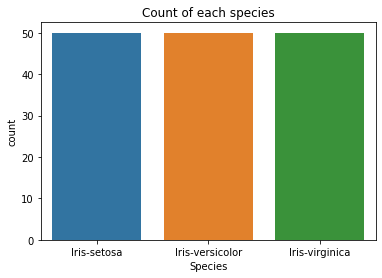

In [ ]:
plt.title("Count of each species")
sns.countplot(df['Species'],label="Count")

**6.1 Graph between SepalLengthCm and counts according to it's species**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


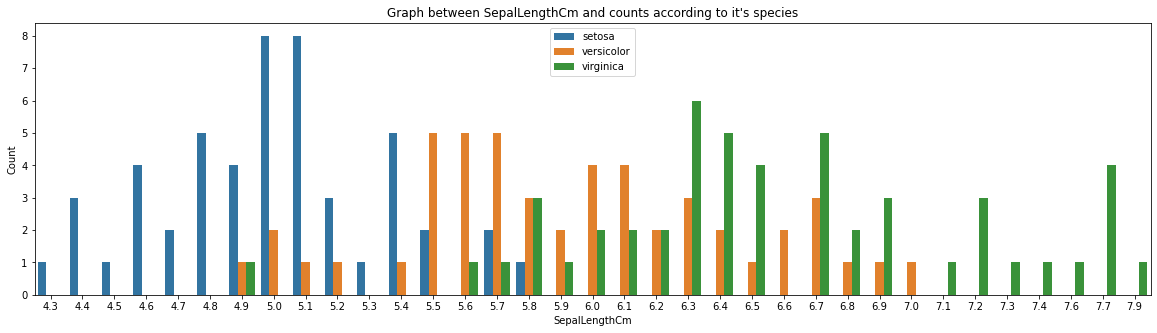

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["SepalLengthCm"], hue=df["Species"])
plt.ylabel("Count")
plt.xlabel("SepalLengthCm")
plt.xticks()
plt.title("Graph between SepalLengthCm and counts according to it's species")
plt.legend(["setosa","versicolor","virginica"])
plt.show()

**6.2 Graph between SepalWidthCm and counts according to it's species**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


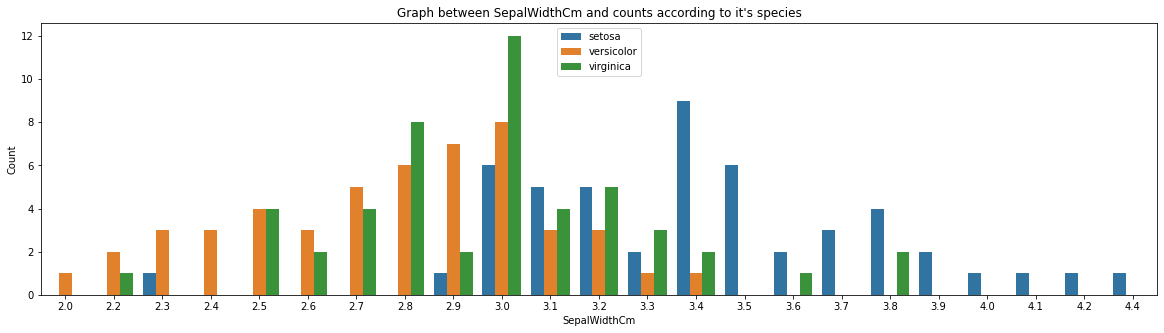

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["SepalWidthCm"], hue=df["Species"])
plt.ylabel("Count")
plt.xlabel("SepalWidthCm")
plt.xticks()
plt.title("Graph between SepalWidthCm and counts according to it's species")
plt.legend(["setosa","versicolor","virginica"])
plt.show()

**6.3 Graph between PetalLengthCm and counts according to it's species**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


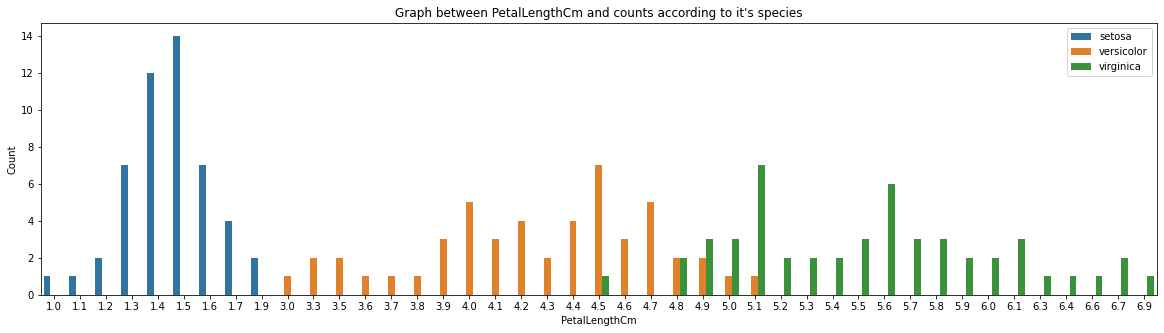

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["PetalLengthCm"], hue=df["Species"])
plt.ylabel("Count")
plt.xlabel("PetalLengthCm")
plt.xticks()
plt.title("Graph between PetalLengthCm and counts according to it's species")
plt.legend(["setosa","versicolor","virginica"])
plt.show()

**6.4 Graph between PetalWidthCm and counts according to it's species**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


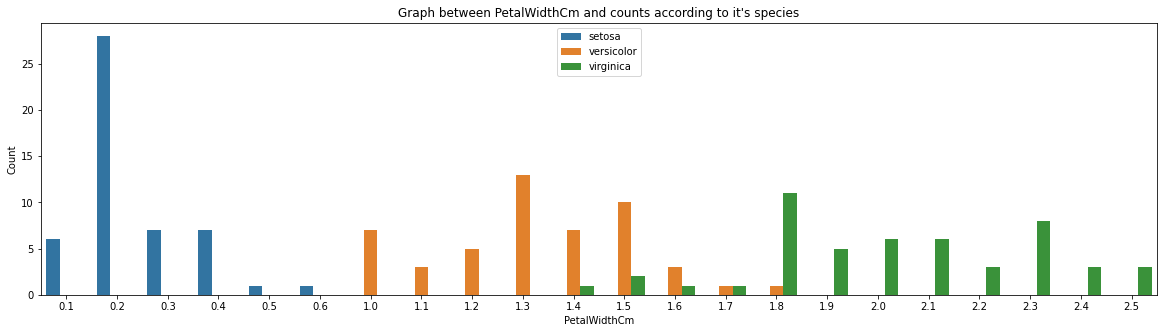

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(df["PetalWidthCm"], hue=df["Species"])
plt.ylabel("Count")
plt.xlabel("PetalWidthCm")
plt.xticks()
plt.title("Graph between PetalWidthCm and counts according to it's species")
plt.legend(["setosa","versicolor","virginica"])
plt.show()

**7. Preprocessing**

In [234]:
X  = df
y = df
X = X.drop(["Id","Species"],axis=1)
y = y.drop(["Id","SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"],axis=1)
label_encoding_cols=['Species']
for i in label_encoding_cols:
    y[i]=y[i].astype("category")
    y[i]=y[i].cat.codes

**8. Determining the best clusters numbers using Elbow method**

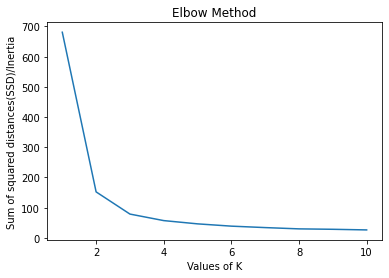

In [238]:
SSD = []
K = range(1,11)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 SSD.append(kmeans.inertia_)

plt.plot(K,SSD)
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances(SSD)/Inertia') 
plt.title('Elbow Method')
plt.show()

**9. K means model building**

In [ ]:
k_means = KMeans(n_clusters=3,max_iter = 500,random_state=42)

k_means.fit(X) 

k_means_pred = k_means.predict(X)

print(k_means_pred)

[0 0 1 2 1 2 0 0 1 2 1 1 2 1 2 0 1 0 2 2 0 1 2 1 2 1 1 0 1 2 2 0 1 1 2 2 1
 1 2 0 0 1 0 0 2 0 0 2 0 1 0 2 2 0 0 1 0 2 1 0 1 1 1 2 2 2 2 1 2 2 1 0 2 0
 0 0 2 2 2 0 0 1 0 1 2 0 0 2 1 0 1 0 0 1 1 2 1 1 0 2 2 2 0 0 2 0 1 2 0 1 1
 0 2 1 1 2 1 2 1 0 1 1 2 1 0 1 1 2 2 1 0 0 2 2 0 2 1 2 2 1 0 0 1 2 0 0 1 0
 0 2]


**10. Determining inertia**

In [ ]:
k_means.inertia_

283.60067487251115

**11. Determining clusters centroids**

In [ ]:
centroids = k_means.cluster_centers_

print(centroids)

[[-2.70146566  8.90287872]
 [-6.75399588 -6.88944874]
 [ 4.58407676  2.1431444 ]]


**12. Clusters Visualization**

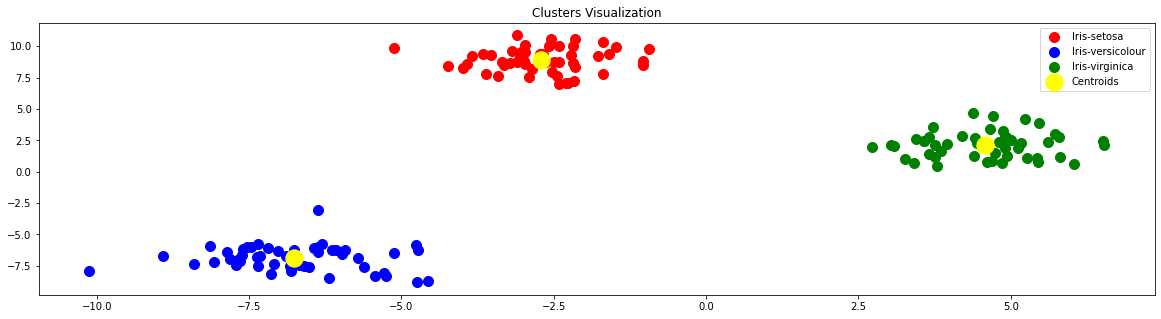

In [ ]:
plt.figure(figsize=(20,5))
plt.scatter(X[k_means_pred==0, 0], X[k_means_pred==0, 1], s=100, c='red', label ='Iris-setosa')
plt.scatter(X[k_means_pred==1, 0], X[k_means_pred==1, 1], s=100, c='blue', label ='Iris-versicolour')
plt.scatter(X[k_means_pred==2, 0], X[k_means_pred==2, 1], s=100, c='green', label ='Iris-virginica')

plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters Visualization')
plt.legend()
plt.show()

**13. Model evalutaion**

In [ ]:
acc_score = accuracy_score(y, k_means_pred)

print("Accuracy of prediction = ",acc_score * 100 ,"%")

Accuracy of prediction =  32.0 %
